# Multiclass Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data is already split into training and testing subsets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Show first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

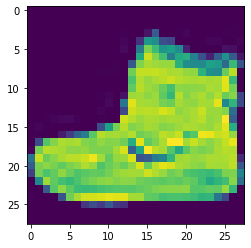

In [4]:
# Plot first training sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [5]:
# List of actual classes

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

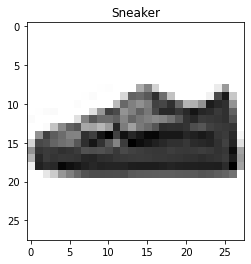

In [6]:
# Plot an example image and its label
index_of_choice = 108
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

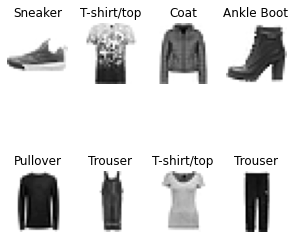

In [7]:
# Random 4 images from the training dataset
import random

plt.figure(figsize=(5, 5))

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Model 1

In [8]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model - Sparse Categorical Crossentropy
model_mc1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3213 - accuracy: 0.1023 - val_loss: 2.2652 - val_accuracy: 0.1165
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2402 - accuracy: 0.1313 - val_loss: 2.1919 - val_accuracy: 0.1496
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8701 - accuracy: 0.2247 - val_loss: 1.7527 - val_accuracy: 0.2491
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7018 - accuracy: 0.2760 - val_loss: 1.6775 - val_accuracy: 0.2866
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6465 - accuracy: 0.2878 - val_loss: 1.6350 - val_accuracy: 0.2943
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6210 - accuracy: 0.2912 - val_loss: 1.6120 - val_accuracy: 0.2901
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6081 - accuracy: 0.2861 - val_loss: 1.6074 - val_accuracy:

In [9]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [10]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3643 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [12]:
# Model summary
model_mc1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
